# Area Timm Analysis

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.9.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
timm_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/Timm Area.csv')

In [4]:
timm_df.columns

Index(['Subject', 'Genotype', 'Sex', 'Level', 'Left', 'Right', 'Mean Area'], dtype='object')

In [5]:
timm_df

,Subject,Genotype,Sex,Level,Left,Right,Mean Area
0,FWT_1,WT,Female,-1.3,144060,159900,151980.0
1,FWT_1,WT,Female,-1.5,137980,148070,143025.0
2,FWT_1,WT,Female,-1.7,131070,162820,146945.0
3,FWT_1,WT,Female,-1.9,135360,130730,133045.0
4,FWT_1,WT,Female,-2.1,126260,130180,128220.0
5,FWT_2,WT,Female,-1.3,132910,143190,138050.0
6,FWT_2,WT,Female,-1.5,141060,144540,142800.0
7,FWT_2,WT,Female,-1.7,166060,161450,163755.0
8,FWT_2,WT,Female,-1.9,146450,166560,156505.0
9,FWT_2,WT,Female,-2.1,129610,120250,124930.0


In [7]:
pg.normality(data = timm_df, dv = 'Mean Area', group = 'Genotype')

,W,pval,normal
WT,0.935588,0.069223,True
KO,0.960454,0.318153,True


In [8]:
pg.ttest(timm_df['Mean Area'][timm_df['Genotype']=='WT'], timm_df['Mean Area'][timm_df['Genotype']=='KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-4.091955,58,two-sided,0.000134,"[-33087.4, -11349.57]",1.056538,172.227,0.98046


In [10]:
timm_df.groupby(['Genotype', 'Subject']).count()

Sex  Level  Left  Right  Mean Area
Genotype Subject                                    
KO       FKO_1      5      5     5      5          5
         FKO_2      5      5     5      5          5
         FKO_3      5      5     5      5          5
         MKO_1      5      5     5      5          5
         MKO_2      5      5     5      5          5
         MKO_3      5      5     5      5          5
WT       FWT_1      5      5     5      5          5
         FWT_2      5      5     5      5          5
         FWT_3      5      5     5      5          5
         MWT_1      5      5     5      5          5
         MWT_2      5      5     5      5          5
         MWT_3      5      5     5      5          5

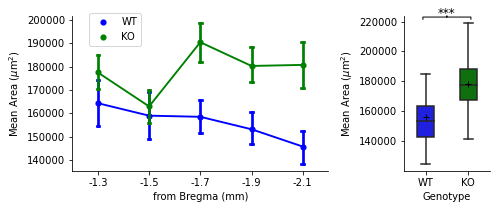

In [16]:
timm_fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(7, 3))
timm_point = sns.pointplot(x='Level', y='Mean Area', hue='Genotype', data=timm_df, palette=[
                           'b', 'g'], capsize=.05, scale=.7, errorwidth=.05, ci=68, ax=a0, label=['a', 'b'])
a0.set_ylabel(r'Mean Area ($\mu$m$^2$)')
a0.set_xlabel('from Bregma (mm)')
a0.invert_xaxis()
sns.despine()
timm_point.get_legend().remove()
timm_fig.legend(loc='upper right', bbox_to_anchor=(.29, .93), ncol=1)
timm_total = sns.boxplot(x='Genotype', y='Mean Area', data=timm_df,
                         palette=['b', 'g'], ax=a1, showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, showfliers = False)
a1.set_ylabel(r'Mean Area ($\mu$m$^2$)')
a1.annotate('***', xy=(0.5, .99), xytext=(0.5, .97), xycoords='axes fraction', fontsize=12, ha='center',
            va='bottom', arrowprops=dict(arrowstyle='-[, widthB= 2, lengthB=.2', lw=1, color='black'))
#a1.set_ylim(0, 20000)
plt.tight_layout()

In [18]:
timm_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/timm_area.svg')